In [3]:
#If using a jupyter notebook in the rdkit environment,
#make sure to conda install notebook within the environment. 

import PIL #needed for IPythonConsole

from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole #needed to show molecules 
from rdkit.Chem import Draw
from rdkit.Chem import Recap,BRICS
from rdkit.Chem.Draw.MolDrawing import MolDrawing, DrawingOptions #Only needed if modifying defaults

### Drawing a molecule

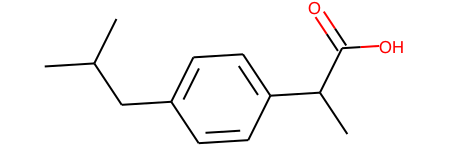

In [4]:
ibu = Chem.MolFromSmiles('CC(C)Cc1ccc(cc1)C(C)C(=O)O')
ibu

Or, if you want a nice SVG:

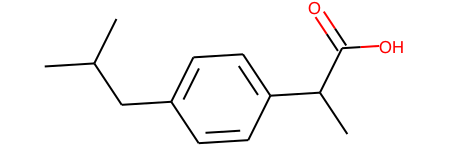

In [5]:
IPythonConsole.ipython_useSVG=True
ibu

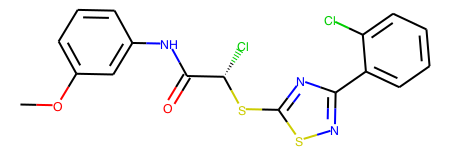

In [6]:
#Another example of a made-up molecule (Compliments of Greg Landrum)
fake_mol = Chem.MolFromSmiles('COc1cccc(NC(=O)[C@H](Cl)Sc2nc(ns2)c3ccccc3Cl)c1')
fake_mol

We can add in the Hs and display the molecule:

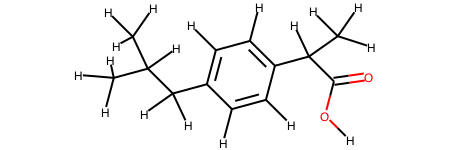

In [7]:
ibuH = AllChem.AddHs(ibu)
ibuH

With the Hs added in, we can calculate the Total Polar Surface Area (TPSA)

In [8]:
Chem.rdMolDescriptors.CalcTPSA(ibuH)

37.3

For visualization purposes, we can also add in atom numbers.

In [9]:
#This is not working
#DrawingOptions.includeAtomNumbers=True
#ibu

### Drawing a grid of molecules

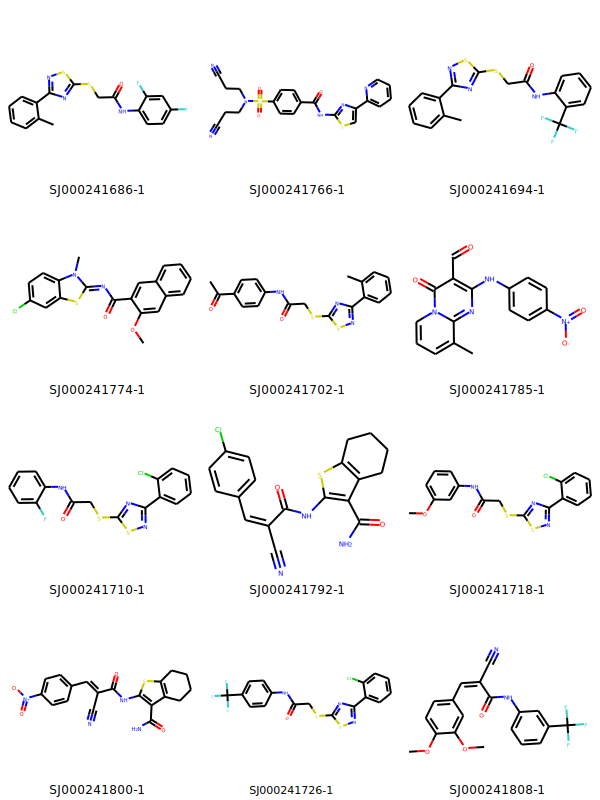

In [11]:
# molecules from the 2014 TDT challenge (Again, from Greg Landrum)
data = [('SJ000241686-1', 'Cc1ccccc1c2nsc(SCC(=O)Nc3ccc(F)cc3F)n2'),
 ('SJ000241766-1', 'O=C(Nc1nc(cs1)c2ccccn2)c3ccc(cc3)S(=O)(=O)N(CCC#N)CCC#N'),
 ('SJ000241694-1', 'Cc1ccccc1c2nsc(SCC(=O)Nc3ccccc3C(F)(F)F)n2'),
 ('SJ000241774-1', 'COc1cc2ccccc2cc1C(=O)\\N=C\\3/Sc4cc(Cl)ccc4N3C'),
 ('SJ000241702-1', 'CC(=O)c1ccc(NC(=O)CSc2nc(ns2)c3ccccc3C)cc1'),
 ('SJ000241785-1', 'CC1=CC=CN2C(=O)C(=C(Nc3ccc(cc3)[N+](=O)[O-])N=C12)C=O'),
 ('SJ000241710-1', 'Fc1ccccc1NC(=O)CSc2nc(ns2)c3ccccc3Cl'),
 ('SJ000241792-1', 'NC(=O)c1c2CCCCc2sc1NC(=O)\\C(=C/c3ccc(Cl)cc3)\\C#N'),
 ('SJ000241718-1', 'COc1cccc(NC(=O)CSc2nc(ns2)c3ccccc3Cl)c1'),
 ('SJ000241800-1',
  'NC(=O)c1c2CCCCc2sc1NC(=O)\\C(=C\\c3ccc(cc3)[N+](=O)[O-])\\C#N'),
 ('SJ000241726-1', 'FC(F)(F)c1ccc(NC(=O)CSc2nc(ns2)c3ccccc3Cl)cc1'),
 ('SJ000241808-1', 'COc1ccc(\\C=C(\\C#N)/C(=O)Nc2cccc(c2)C(F)(F)F)cc1OC')]

mols = [Chem.MolFromSmiles(y) for x,y in data]
labels = [x for x,y in data]

img = Draw.MolsToGridImage(mols,legends=labels,molsPerRow=3)
img

To save this image use:

In [12]:
# img.save('name_molgrid.o.png')

### Highlighting Substructures

To highlight a substructure matching (more details on this in a later tutorial), we can do the following

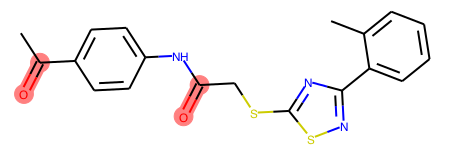

In [32]:
#Highlight the carbonyls
mols[4].GetSubstructMatches(Chem.MolFromSmiles('C=O'))
mols[4]

### Drawing in 3D

To draw in 3D, I am actually going to use py3Dmol, which was suggested by Greg Landrum of RDKit and the bloggers at OPIG (Oxford Protein Informatics Group).

py3Dmol supports sdf, pdb, and many other formats.

You might need to change your browser settings so that WebGL is supported.
See https://superuser.com/questions/836832/how-can-i-enable-webgl-in-my-browser

In [1]:
import py3Dmol

view = py3Dmol.view(query='pdb:1hvr')
view.setStyle({'cartoon':{'color':'spectrum'}})
view